# 二维向量

本文档描述了二维向量的一些数学知识在编程方面的应用, 包括:
- 在坐标系上绘制二维向量 (坐标点)
- 求二维向量的长度 (原点到坐标点的长度, 勾股定理)
- 二维向量的加减 (向量叠加)
- 二维向量和标量的运算
- 二维向量的距离 (即两个二维向量相减所得向量的长度)


In [37]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector2D, Number
from common.vector_draw import Color, Points, Segment, Polygon, Arrow, draw
from typing import Tuple, Iterable, List, Optional
from math import sqrt, pi
from random import uniform


## 1. 向量绘制


### 1.1. 绘制向量

**知识:** 向量是一组数的集合, 集合中的每个数表示坐标系上的一个值. 对于二维向量, 是由 `(x, y)` 两个数组成, 分别表示在二维坐标系上 `x` 轴和 `y` 轴两个坐标值


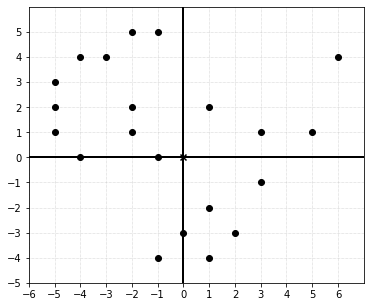

In [38]:
# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

# 在坐标轴上绘制向量集合, 即二维坐标系上的一组点
draw(
    Points(*dino_vectors, show_coord=False),
)


**知识:** 在向量绘制的基础上, 将其中的两个点用线段连接


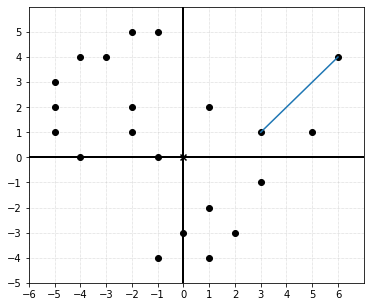

In [39]:
# 在坐标轴上绘制向量集合, 并绘制一条线段连接向量中的两个点
draw(
    Points(*dino_vectors, show_coord=False),
    Segment((6, 4), (3, 1)),
)


**知识:** 在向量绘制的基础上, 绘制一组线段, 将向量中的每个点两两进行连接, 绘制一个恐龙图形


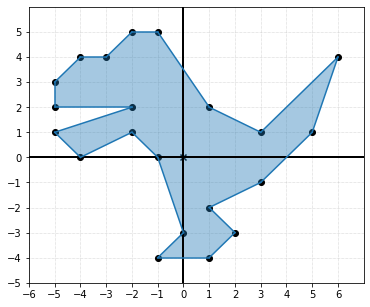

In [40]:
# 在坐标轴上绘制向量集合, 并绘制一组线段组成的多边形
draw(
    Points(*dino_vectors, show_coord=False),
    Polygon(*dino_vectors, fill=Color.blue),
)


**知识:** 绘制公式 $y=x^2$ 时, 每个 `(x, y)` 坐标的图


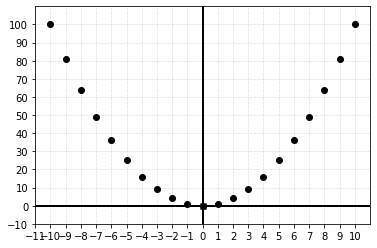

In [41]:
# 产生 y = x ^ 2 的点集
vs = [(x, x**2) for x in range(-10, 11)]

# 绘制点集
draw(
    Points(*vs, show_coord=False),
    grid=(1, 10),
    nice_aspect_ratio=False,
)


## 2. 向量计算


#### 2.1. 向量相加

**知识:** 向量相加即将向量的对应分量相加, 得到新向量, 例如: `(1, 2) + (3, 4) = (4, 6)`

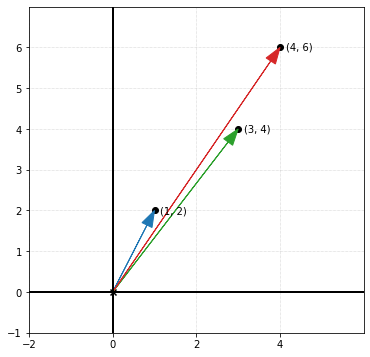

In [42]:
# 定义两个向量
v1, v2 = (1, 2), (3, 4)

# 计算向量相加的结果
vr = (v1[0] + v2[0], v1[1] + v2[1])

# 绘制三个向量
draw(
    Points(v1, v2, vr),  # 绘制向量点
    Arrow(v1, color=Color.blue),  # 绘制到 v1 的箭头
    Arrow(v2, color=Color.green),  # 绘制到 v2 的箭头
    Arrow(vr),  # 绘制到 vr 的箭头
    grid=(2, 1),
)


可以理解为, 向量 `v1` 和 `v2` 首尾相接后得到 `vr`. 所以, 利用向量加法, 可以将向量进行移动

**知识:** 移动一个点, 即给点坐标的 `x` 和 `y` 两个分量增加偏移量


In [43]:
def add(v1: Vector2D, v2: Vector2D) -> Vector2D:
    """
    将向量 `v1` 和 `v2` 相加

    Args:
        v1 (Vector2D): 相加的两个向量之一
        v2 (Vector2D): 相加的两个向量之一

    Returns:
        Vector2D: 向量相加之和
    """
    return (v1[0] + v2[0], v1[1] + v2[1])


**知识:** 移动一个向量, 即将向量中的所有点进行移动


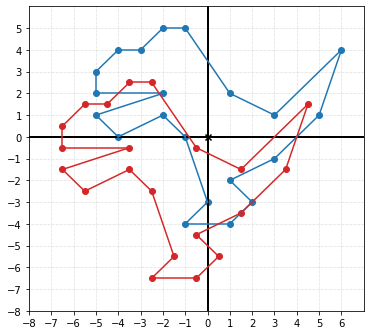

In [44]:
# 将向量进行移动, 即将向量中的每个点进行偏移
dino_vectors2 = [add(v, (-1.5, -2.5)) for v in dino_vectors]

# 绘制偏移前的向量和偏移后的向量
draw(
    Points(*dino_vectors, color=Color.blue, show_coord=False),
    Polygon(*dino_vectors, color=Color.blue),
    Points(*dino_vectors2, color=Color.red, show_coord=False),
    Polygon(*dino_vectors2, color=Color.red),
)


**知识:** 将偏移前后的两个向量对应点进行连接, 即可绘制向量偏移的位移. 通过此方法, 将恐龙图形移动到新的位置


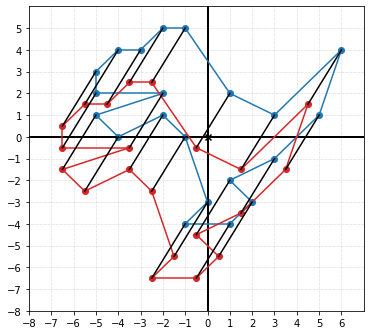

In [45]:
# 计算两个向量偏移的位移
arrows = [
    Segment(tip, tail, color=Color.black)  # 以获取的点组成线段对象集合
    for tip, tail in zip(dino_vectors2, dino_vectors)  # 获取两个向量对应的点
]

# 用线段将偏移前后的两个向量的对应点进行连接
draw(
    Points(*dino_vectors, color=Color.blue, show_coord=False),
    Polygon(*dino_vectors, color=Color.blue),
    Points(*dino_vectors2, color=Color.red, show_coord=False),
    Polygon(*dino_vectors2, color=Color.red),
    *arrows,
)


### 2.2. 向量长度

向量的长度即从坐标原点到向量点的距离


**知识:** 一个向量可以进行分解, 分解出的两个向量和原始向量可以组成一个直角三角形, 例如向量 `(4, 3)` 可以分解为 `(4, 0)` 和 `(0, 3)` 两个向量


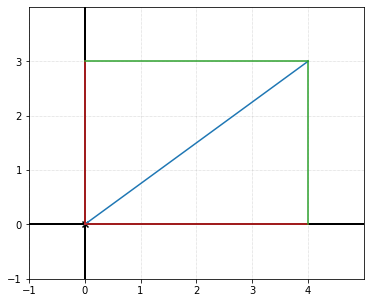

In [46]:
draw(
    Segment([0, 0], [4, 3], color=Color.blue),  # 绘制 (4, 3) 向量的长度
    Segment([0, 0], [4, 0], color=Color.red),  # 绘制 (4, 3) 向量在 x 轴的分量 (4, 0)
    Segment([0, 0], [0, 3], color=Color.red),  # 绘制 (4, 3) 向量在 y 轴的分量 (0, 3)
    Segment([4, 0], [4, 3], color=Color.green),
    Segment([0, 3], [4, 3], color=Color.green),
)


**知识:** 通过勾股定理, 即可求出一个二维向量的长度


In [47]:
def length(v: Vector2D) -> Number:
    """
    计算一个二维向量的长度

    Args:
        v (Vector2D): 一个向量

    Returns:
        Number: 向量长度
    """
    return sqrt(v[0]**2 + v[1]**2)


In [48]:
vec = (4, 3)

# 计算向量的长度
length(vec)


5.0

### 2.3. 向量和标量

向量可以和一个标量 (scalar) 进行计算. 标量即一个普通数字, 不具备长度和方向.


**知识:** 向量和标量相乘的结果是对向量的**缩放**


In [49]:
def scale(v: Vector2D, scalar: Number) -> Vector2D:
    """
    二维向量和标量相乘

    Args:
        v (Vector2D): 二维向量

    Returns:
        Vector2D: 缩放后的向量
    """
    return v[0] * scalar, v[1] * scalar


**知识:** 计算一个向量放大后的值


In [50]:
v = (1.2, -3.1)
scalar = 6.5

# 计算向量 v 和标量 scalar 相乘的结果
r = scale(v, scalar)
r


(7.8, -20.150000000000002)

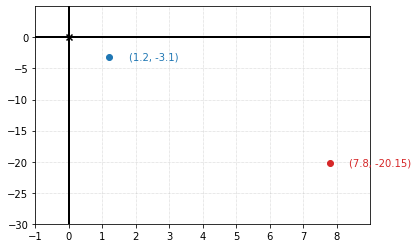

In [51]:
# 绘制原始向量和放大后的向量
draw(
    Points(v, color=Color.blue),  # 绘制原始向量, 蓝色
    Points(r, color=Color.red),  # 绘制放大后的向量, 红色
    grid=(1, 5),
    nice_aspect_ratio=False,
)


In [52]:
v = (6, 4)
scalar = -0.5

# 计算向量 v 和标量 scalar 相乘的结果
r = scale(v, scalar)
r


(-3.0, -2.0)

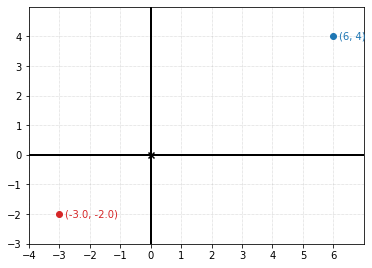

In [53]:
# 绘制原始向量和放大后的向量
draw(
    Points(v, color=Color.blue),  # 绘制原始向量, 蓝色
    Points(r, color=Color.red),  # 绘制放大后的向量, 红色
)


### 2.4. 向量运算


**知识:** 将多个二维向量相加, 得到新的二维向量


In [54]:
def add(*vectors: Vector2D) -> Vector2D:
    """
    将一个二维向量集合中的所有向量进行相加后返回结果

    Args:
        vectors (Iterable[Vector2D]): 向量集合

    Returns:
        Vector2D: 所有向量相加后的结果
    """
    x, y = 0, 0
    for v in vectors:
        x += v[0]
        y += v[1]

    return (x, y)


In [55]:
# 二维向量集合
vs = [
    (1, 2),
    (2, 4),
    (3, 6),
    (4, 8),
]

# 将向量集合中的所有向量相加, 得到一个结果向量
r = add(*vs)
r


(10, 20)

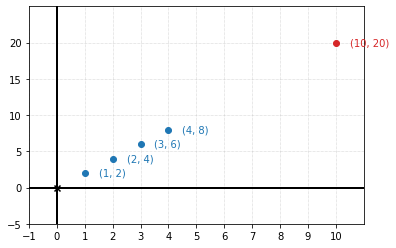

In [56]:
# 查看原向量集合的点和相加后得到的向量点
draw(
    Points(*vs, color=Color.blue),  # 原向量集合包含的点, 蓝色
    Points(r, color=Color.red),  # 向量集合中所有向量相加后的结果, 红色
    grid=(1, 5),
    nice_aspect_ratio=False,
)


**知识:** 对向量集合中的每个点进行位置移动

In [57]:
def translate(offset: Vector2D, vectors: Iterable[Vector2D]) -> List[Vector2D]:
    """
    移动一个向量集合中的每个向量

    最终, 向量组成的形态不变, 但向量的位置会发生变化

    Args:
        offset (Vector2D): 向量偏移量
        vectors (Iterable[Vector2D]): 向量集合

    Returns:
        List[Vector2D]: 移动位置后的向量集合
    """
    return [add(v, offset) for v in vectors]


In [58]:
# 定义原向量集合
vs = [
    (0, 0),
    (0, 1),
    (-3, -3),
]

# 定义要移动的偏移量
offset = (1, 1)

# 对向量进行移动
r = translate(offset, vs)
r


[(1, 1), (1, 2), (-2, -2)]

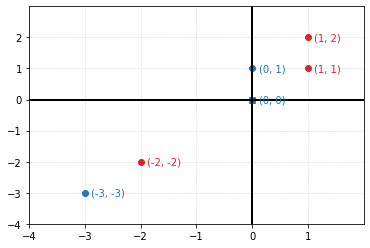

In [59]:
# 查看向量移动后和原向量的比较
draw(
    Points(*vs, color=Color.blue),  # 绘制原始向量, 蓝色
    Points(*r, color=Color.red),  # 绘制放大后的向量, 红色
    nice_aspect_ratio=False,
)


**练习:** 通过向量位移, 将前面绘制的恐龙图形复制 100 次

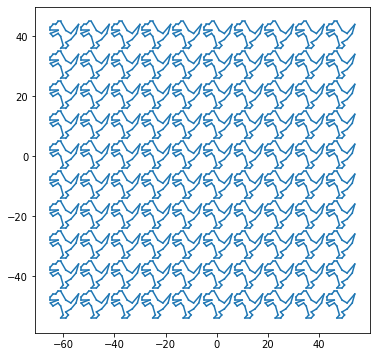

In [60]:
# 定义 100 只恐龙图形的偏移向量
translations = [
    (12*x, 10*y)  # 设定 x 和 y 轴的偏移
    for x in range(-5, 5)  # 设定 x 轴的偏移计算范围
    for y in range(-5, 5)  # 设定 y 轴的偏移计算范围
]

dinos = [
    # 将 dino_vectors 中的恐龙图形的每个向量进行偏移
    Polygon(*translate(t, dino_vectors), color=Color.blue)
    for t in translations
]

# 绘制偏移后的 100 只恐龙
draw(
    *dinos,
    grid=None,
    axes=None,
    origin=None,
)


**练习:** 在 `dino_vectors` 向量集合中, 找到两个向量见的最长距离

可以通过 `max` 函数配合 `length` 函数 (通过勾股定理计算两点距离的函数) 快速得到结果

In [61]:
# 通过 length 函数计算向量集合中两两向量的距离, 再通过 max 函数计算最大的那个
max(dino_vectors, key=length)


(6, 4)

**练习:** 对于向量 $\omega$, 点坐标为 $(\sqrt2, \sqrt3)$, 计算 $\omega\cdot\pi$ 的近似结果

In [62]:
# 定义 w 向量
w = (sqrt(2), sqrt(3))

# 向量放大 pi
w_scaled = scale(w, pi)
w_scaled

(4.442882938158366, 5.441398092702653)

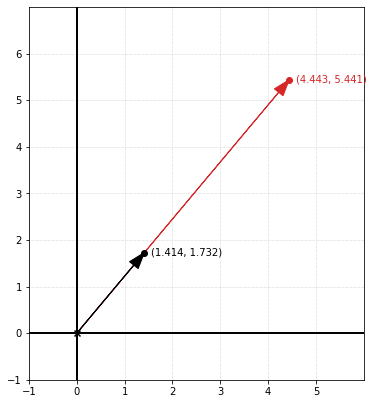

In [63]:
# 以箭头图形绘制缩放后和缩放前的向量
draw(
    Points(w_scaled, color=Color.red),
    Arrow(w_scaled, color=Color.red),  # 缩放后的向量
    Points(w, color=Color.black),
    Arrow(w, color=Color.black),  # 缩放前的向量
)


**练习:** 对于向量 $z = (-1, 1)$ 和 $v = (1, 1)$, 且 $r$ 和 $s$ 是两个标量, 且符合 $-3 < r < 3$ 和 $-1 < s < 1$. 则标记 $r\cdot z + s \cdot v$ 结果在坐标系上的可能的位置

由于标量 $r$ 和 $s$ 的范围已被限定, 则所有的向量点都会位于一个顶点为 $(2, 4), (4, 2), (2, -4), (4, -2)$ 的平行四边形中

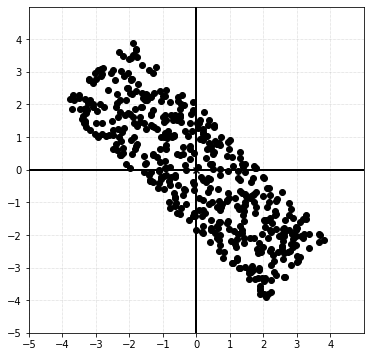

In [64]:
z = (-1, 1)
v = (1, 1)


def random_r() -> Number:
    return uniform(-3, 3)


def random_s() -> Number:
    return uniform(-1, 1)


possibilities = [
    add(scale(z, random_r()), scale(v, random_s()))
    for _ in range(500)
]

draw(
    Points(*possibilities, show_coord=False),
)


## 3. 向量的距离

**知识:** 求两个向量的距离, 两个向量的距离即两个向量的差向量的长度 (从原点计算)

In [65]:
def subtract(v1: Vector2D, v2: Vector2D) -> Vector2D:
    """
    计算两个向量的差值

    向量差值即向量的各分量差值组成的向量值

    Args:
        v1 (Vector2D): 第一个向量
        v2 (Vector2D): 第二个向量

    Returns:
        Vector2D: 两个向量差
    """
    return (v1[0] - v2[0], v1[1] - v2[1])


In [66]:
def distance(v1: Vector2D, v2: Vector2D) -> Number:
    """
    计算两个向量的距离

    两个向量距离即两个向量的差的长度

    Args:
        v1 (Vector2D): 第一个向量
        v2 (Vector2D): 第二个向量

    Returns:
        Number: 两个向量的距离
    """
    return length(subtract(v1, v2))


In [67]:
# 计算两个向量的距离
distance((20, 10), (30, 20))

14.142135623730951

**知识:** 如果对一组向量两两求距离并相加, 加上首位两个向量的距离, 即可计算一组向量围成的图形的周长

In [68]:
def perimeter(vectors: Iterable[Vector2D]) -> Number:
    """
    计算一组向量围成的图形的周长

    Args:
        vectors (Iterable[Vector2D]): 一组向量

    Returns:
        Number: 图形周长
    """
    distances = [
        distance(vectors[i], vectors[(i+1) % len(vectors)])
        for i in range(len(vectors))
    ]
    return sum(distances)


 求一个正方形周长

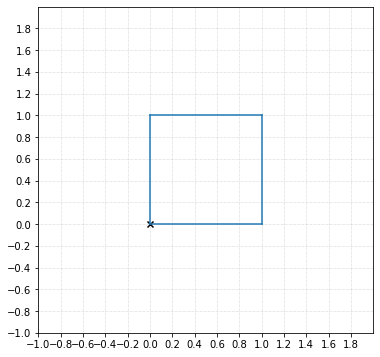

In [69]:
# 定义一个表示正方形的向量集合
square = [
    (1, 0),
    (1, 1),
    (0, 1),
    (0, 0),
]

# 绘制正方形图形
draw(
    Polygon(*square),
    grid=(0.2, 0.2),
    axes=None,
)


In [70]:
# 求正方形周长
perimeter(square)

4.0

求恐龙图形的周长

In [71]:
# 计算恐龙图形的周长
perimeter(dino_vectors)


44.77115093694563

**练习:** 已知两个向量的距离, 求可能得位移

设向量 $u = (1, -1)$, 向量 $v = (n, m)$, 且 $n > m$, 如果 $u, v$ 的距离是 `13`, 求从 $u$ 到 $v$ 的位移

In [72]:
result: Optional[Tuple[Number, Number]] = None

for n in range(-12, 15):  # n 在 1 的前后 13 个单位内
    for m in range(-14, 13):  # m 在 -1 的前后 13 个单位内
        if distance((n, m), (1, -1)) == 13 and n > m > 0:
            result = (n, m)
            break

print(f"Found vector is: {result}")  # 输出找到符合要求的向量值

offset = subtract(result, (1, -1))
print(f"Offset from (1, -1) is: {offset}")  # 输出所得向量和 (1, -1) 的位移


Found vector is: (13, 4)
Offset from (1, -1) is: (12, 5)
